# Batch Loader for loading Images

In [1]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

#Image generators 
train_datagen = ImageDataGenerator(rescale=1/255)
validation_datagen = ImageDataGenerator(rescale=1/255)

#Training Generator
train_generator = train_datagen.flow_from_directory(
        'train/', 
        classes = ['sedan', 'suv'],
        target_size=(200, 200), 
        batch_size=120,
        class_mode='binary')

#Validation Generator
validation_generator = validation_datagen.flow_from_directory(
        'validation/',  
        classes = ['sedan', 'suv'],
        target_size=(200, 200),  
        batch_size=19,
        class_mode='binary',
        shuffle=False)

Found 3984 images belonging to 2 classes.
Found 1368 images belonging to 2 classes.


# Loading Libraries and dependencies

In [8]:
import tensorflow as tf
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
import numpy as np
from itertools import cycle

from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt

In [3]:
physical_devices = tf.config.experimental.list_physical_devices('GPU')
assert len(physical_devices) > 0, "Not enough GPU hardware devices available"
config = tf.config.experimental.set_memory_growth(physical_devices[0], True)

# Transfer learning using MobileNet

In [4]:
#MobileNet architecture with GlobalAveragePooling2D layer and pretrained weights
model = Sequential()
model.add(MobileNetV2(include_top = False, weights="imagenet", input_shape=(None, None, 3)))
model.add(tf.keras.layers.GlobalAveragePooling2D())
model.add(Dense(1, activation = 'sigmoid'))
model.layers[0].trainable = False


# Compiling the model with binary cross entropy and accuracy

In [5]:
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras import optimizers
model.compile(optimizer=RMSprop(lr=0.01), loss = 'binary_crossentropy', metrics = 'accuracy')

# Training the model

In [6]:
history = model.fit(
      train_generator,
      steps_per_epoch=8,  
      epochs=25,
      verbose=1,
      validation_data = validation_generator,
      validation_steps=8)

Epoch 1/25
8/8 [==============================] - 6s 759ms/step - loss: 2.1099 - accuracy: 0.5125 - val_loss: 2.1315 - val_accuracy: 0.1579
Epoch 2/25
8/8 [==============================] - 6s 798ms/step - loss: 0.8058 - accuracy: 0.6708 - val_loss: 1.6515 - val_accuracy: 0.2632
Epoch 3/25
8/8 [==============================] - 6s 780ms/step - loss: 0.8489 - accuracy: 0.6625 - val_loss: 1.4831 - val_accuracy: 0.3421
Epoch 4/25
8/8 [==============================] - 6s 794ms/step - loss: 0.8254 - accuracy: 0.6833 - val_loss: 2.2254 - val_accuracy: 0.2434
Epoch 5/25
8/8 [==============================] - 6s 726ms/step - loss: 0.7814 - accuracy: 0.7118 - val_loss: 1.7096 - val_accuracy: 0.4211
Epoch 6/25
8/8 [==============================] - 6s 776ms/step - loss: 0.5167 - accuracy: 0.7917 - val_loss: 1.2046 - val_accuracy: 0.5395
Epoch 7/25
8/8 [==============================] - 6s 755ms/step - loss: 0.8565 - accuracy: 0.6969 - val_loss: 1.8421 - val_accuracy: 0.4276
Epoch 8/25
8/8 [====

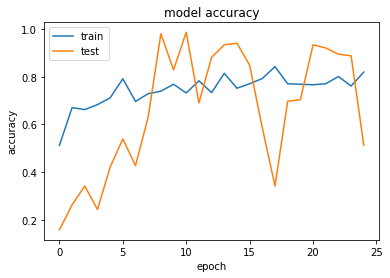

In [9]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Saving the model

In [11]:
model.save("my_h5_model_v6.h5")